In [ ]:
# Project Title :- AI-Based Real Estate Valuation System.

In [94]:
# Task 1.5 - Exploratory Data Analysis (EDA) & Data Visualization.

In [58]:
# Import Necessary Libraries
import folium
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from geopy.geocoders import ArcGIS

import warnings
warnings.filterwarnings('ignore')

In [59]:
# Load the Dataset
mum_prop = pd.read_csv('Cleaned Dataset.csv')
mum_prop.head()

,Property_Name,Location,Region,Property_Age,Availability,Area_Tpye,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Bathroom,Price_Lakh
0,Omkar Alta Monte,W E Highway Malad East Mumbai,Highway Malad,0 to 1 Year,Ready To Move,Super Built Up Area,2900.0,17241,14,3,4,500.0
1,T Bhimjyani Neelkanth Woods,Manpada Thane Mumbai,Manpada Thane,1 to 5 Year,Ready To Move,Super Built Up Area,1900.0,12631,8,3,3,240.0
2,Legend 1 Pramila Nagar,Dahisar West Mumbai,Dahisar Mumbai,10+ Year,Ready To Move,Super Built Up Area,595.0,15966,3,1,2,95.0
3,Unnamed Property,Vidyavihar West Vidyavihar West Central Mumbai...,Central Mumbai,5 to 10 Year,Ready To Move,Built Up Area,1450.0,25862,1,3,3,375.0
4,Unnamed Property,176 Cst Road Kalina Mumbai 400098 Santacruz Ea...,Santacruz Mumbai,5 to 10 Year,Ready To Move,Carpet Area,876.0,39954,5,2,2,350.0


In [39]:
mum_prop.shape

(2580, 12)

In [40]:
mum_prop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Property_Name  2580 non-null   object 
 1   Location       2580 non-null   object 
 2   Region         2580 non-null   object 
 3   Property_Age   2580 non-null   object 
 4   Availability   2580 non-null   object 
 5   Area_Tpye      2580 non-null   object 
 6   Area_SqFt      2580 non-null   float64
 7   Rate_SqFt      2580 non-null   int64  
 8   Floor_No       2580 non-null   int64  
 9   Bedroom        2580 non-null   int64  
 10  Bathroom       2580 non-null   int64  
 11  Price_Lakh     2580 non-null   float64
dtypes: float64(2), int64(4), object(6)
memory usage: 242.0+ KB


In [41]:
mum_prop.Availability.value_counts()

,count
Availability,
Ready To Move,2565
Under Construction,15


In [42]:
mum_prop.Region.value_counts().head(20)

,count
Region,
Central Mumbai,225
Mira Road,201
Kharghar Navi-Mumbai,196
Ulwe Navi-Mumbai,174
Mumbai Thane,166
Mumbai Harbour,104
Dombivli Thane,82
Hiranandani-Estate Thane,79
Ghansoli Navi-Mumbai,76


In [43]:
mum_prop.Region.nunique()

210

In [44]:
mum_prop.describe().round(2)

,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Bathroom,Price_Lakh
count,2580.00,2580.00,2580.00,2580.00,2580.00,2580.00
mean,1026.11,19111.85,8.84,1.96,2.07,174.39
std,2287.13,40760.88,8.10,0.84,0.75,369.48
min,33.57,84.00,-1.00,1.00,1.00,13.00
25%,630.75,8791.75,3.00,1.00,2.00,67.00
50%,850.00,13785.00,6.00,2.00,2.00,111.50
75%,1156.00,22650.00,12.00,2.00,2.00,200.00
max,100000.00,1650000.00,59.00,6.00,7.00,16500.00


In [45]:
Q1 = np.quantile(mum_prop.Area_SqFt,0.02)
Q3 = np.quantile(mum_prop.Area_SqFt,0.98)
med = np.median(mum_prop.Area_SqFt)
IQR = Q3 - Q1
upper_bound = Q3+(1.5*IQR)
lower_bound = Q1-(1.5*IQR)
outliers1 = mum_prop.Area_SqFt[(mum_prop.Area_SqFt <= lower_bound) | (mum_prop.Area_SqFt >= upper_bound)]
mum_prop = mum_prop.drop(outliers1.index).reset_index(drop=True)

In [46]:
Q1 = np.quantile(mum_prop.Rate_SqFt,0.02)
Q3 = np.quantile(mum_prop.Rate_SqFt,0.80)
med = np.median(mum_prop.Rate_SqFt)
IQR = Q3 - Q1
upper_bound = Q3+(1.5*IQR)
lower_bound = Q1-(1.5*IQR)
outliers1 = mum_prop.Rate_SqFt[(mum_prop.Rate_SqFt <= lower_bound) | (mum_prop.Rate_SqFt >= upper_bound)]
mum_prop = mum_prop.drop(outliers1.index).reset_index(drop=True)

In [47]:
mum_prop.describe().round(2)

,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Bathroom,Price_Lakh
count,2538.00,2538.00,2538.00,2538.00,2538.00,2538.00
mean,948.95,16546.14,8.79,1.95,2.05,161.27
std,486.53,10192.02,7.98,0.83,0.73,162.12
min,185.00,1808.00,-1.00,1.00,1.00,13.00
25%,634.25,8762.25,3.00,1.00,2.00,66.25
50%,850.00,13629.50,6.00,2.00,2.00,110.00
75%,1150.00,22278.75,12.00,2.00,2.00,196.75
max,5000.00,55611.00,55.00,6.00,7.00,1900.00


In [48]:
mum_prop.duplicated().sum()

np.int64(7)

In [49]:
mum_prop = mum_prop.drop_duplicates(ignore_index=True)

In [50]:
mum_prop.isna().sum()

,0
Property_Name,0
Location,0
Region,0
Property_Age,0
Availability,0
Area_Tpye,0
Area_SqFt,0
Rate_SqFt,0
Floor_No,0
Bedroom,0


In [51]:
mum_prop.shape

(2531, 12)

In [56]:
# Set the rcParams for all next Visualization
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

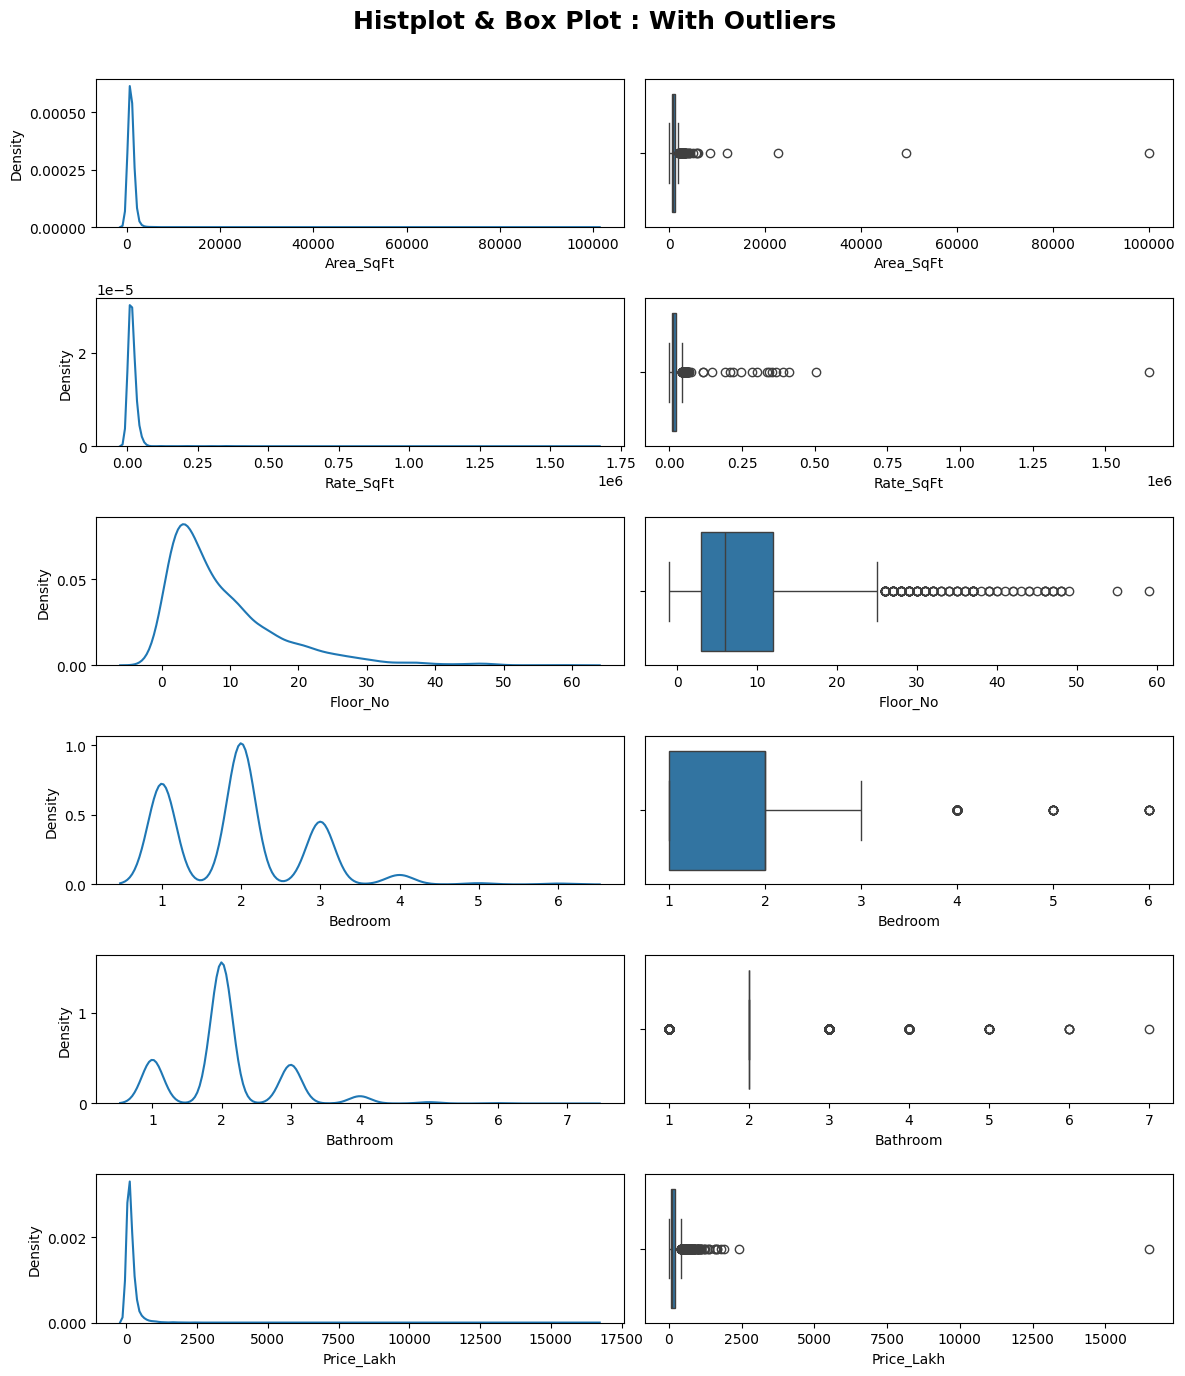

In [54]:
# Hunting Outliers
fig, ax = plt.subplots(6,2, figsize = (12,14))
fig.suptitle('Histplot & Box Plot : With Outliers', size = 18, fontweight="bold")
sns.kdeplot(ax= ax[0,0], data = mum_prop, x = 'Area_SqFt')
sns.boxplot(ax= ax[0,1], data = mum_prop, x = 'Area_SqFt')
sns.kdeplot(ax= ax[1,0], data = mum_prop, x = 'Rate_SqFt')
sns.boxplot(ax= ax[1,1], data = mum_prop, x = 'Rate_SqFt')
sns.kdeplot(ax= ax[2,0], data = mum_prop, x = 'Floor_No')
sns.boxplot(ax= ax[2,1], data = mum_prop, x = 'Floor_No')
sns.kdeplot(ax= ax[3,0], data = mum_prop, x = 'Bedroom')
sns.boxplot(ax= ax[3,1], data = mum_prop, x = 'Bedroom')
sns.kdeplot(ax= ax[4,0], data = mum_prop, x = 'Bathroom')
sns.boxplot(ax= ax[4,1], data = mum_prop, x = 'Bathroom')
sns.kdeplot(ax= ax[5,0], data = mum_prop, x = 'Price_Lakh')
sns.boxplot(ax= ax[5,1], data = mum_prop, x = 'Price_Lakh')
pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

In [67]:
# Checking for Binary, Oridinal, Continous Data & Target Column
num_columns = mum_prop.describe().columns
categorical_cols = mum_prop.describe(include= 'object').columns
mum_prop.nunique()

,0
Property_Name,907
Location,1308
Region,210
Property_Age,12
Availability,2
Area_Tpye,4
Area_SqFt,727
Rate_SqFt,2029
Floor_No,53
Bedroom,6


In [63]:
binary_variables = [i  for i in mum_prop.columns  if (len(mum_prop[i].unique()) == 2)]
binary_variables

['Availability']

In [64]:
ordinal_variables=[i for i in mum_prop.columns if ((len(mum_prop[i].unique()) > 2 ) and (len(mum_prop[i].unique()) <= 53))]
ordinal_variables

['Property_Age', 'Area_Tpye', 'Floor_No', 'Bedroom', 'Bathroom']

In [65]:
continous_variable = [i for i in mum_prop.columns if ((len(mum_prop[i].unique()) > 53))]
continous_variable = continous_variable[3:-1] # Remove Price and Location from data
continous_variable

['Area_SqFt', 'Rate_SqFt']

In [66]:
target_variable = 'Price_Lakh'
target_variable

'Price_Lakh'

In [71]:
# Binary Variables
print(binary_variables)
print('Element in binary category :', len(binary_variables))

['Availability']
Element in binary category : 1


In [72]:
# Ordinal Variables
print(ordinal_variables)
print('Number of ordinal features is :', len(ordinal_variables))

['Property_Age', 'Area_Tpye', 'Floor_No', 'Bedroom', 'Bathroom']
Number of ordinal features is : 5


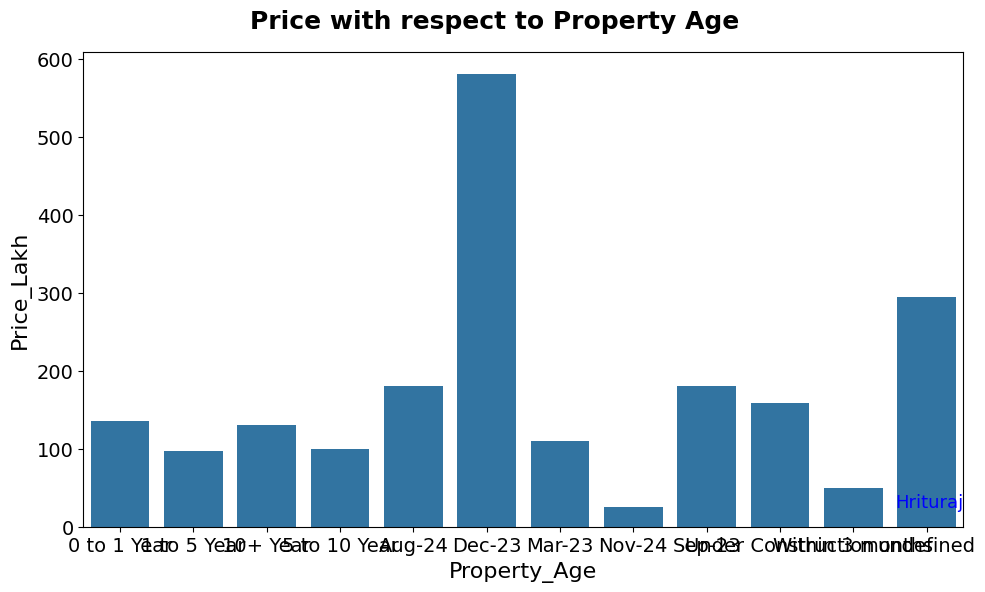

In [88]:
# Data Visualization
# Price with respect to Property Age
mum_prop['Price_Lakh'] = pd.to_numeric(mum_prop['Price_Lakh'], errors='coerce')
age_price = mum_prop.groupby('Property_Age', as_index=False)['Price_Lakh'].median()
fig = plt.figure(figsize=(10,6))
sns.barplot(data=age_price, x='Property_Age', y='Price_Lakh')
fig.suptitle('Price with respect to Property Age', fontsize=18, fontweight="bold")
fig.text(0.9, 0.15, 'Hrituraj', fontsize=13, color='blue')
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

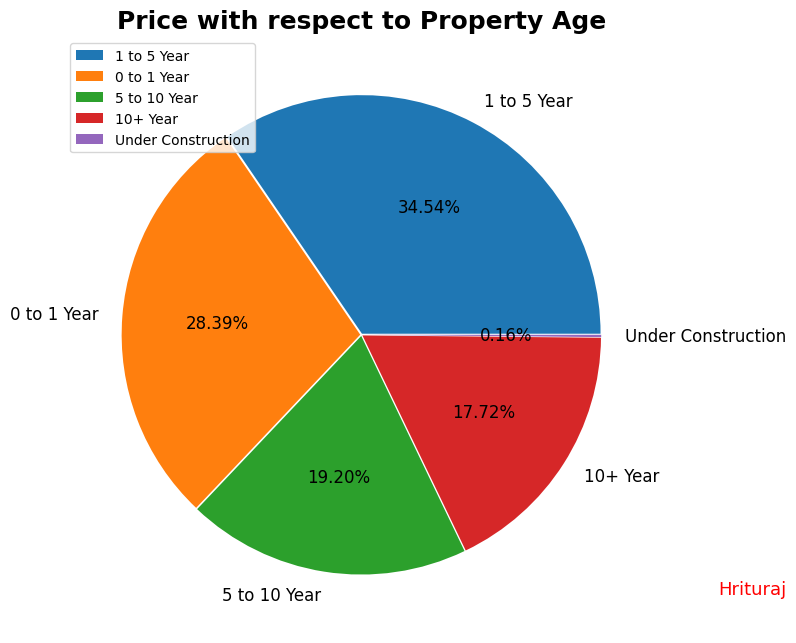

In [81]:
counts = mum_prop['Property_Age'].value_counts()
all_labels = ['1 to 5 Year', '0 to 1 Year', '5 to 10 Year', '10+ Year', 'Under Construction']
labels = [label for label in all_labels if label in counts.index]
explode = [0.005] * len(labels)
fig = plt.figure(figsize=(8,8))
plt.pie(
    counts.loc[labels],
    labels=labels,
    autopct='%.2f%%',
    textprops={'size':'large'},
    explode=explode
)
plt.legend(loc='upper left')
plt.title("Price with respect to Property Age", fontsize=18, fontweight='bold')
fig.text(0.9, 0.15, 'Hrituraj', fontsize=13, color='red')
pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

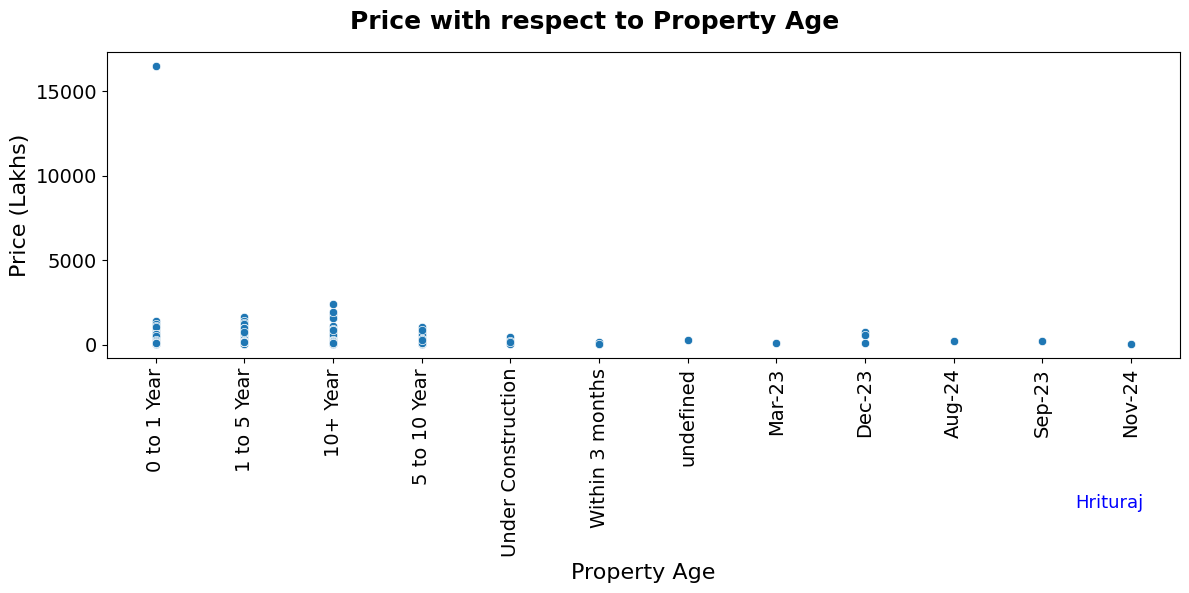

In [84]:
fig = plt.figure(figsize=(12,6))
fig.suptitle('Price with respect to Property Age', size = 18, fontweight="bold")
fig.text(0.9, 0.15, 'Hrituraj',fontsize = 13, color ='blue')
sns.scatterplot(data = mum_prop , x = mum_prop['Property_Age'], y = mum_prop['Price_Lakh'])
plt.xlabel("Property Age", size=16)
plt.ylabel("Price (Lakhs)", size=16)
plt.xticks(rotation=90)
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

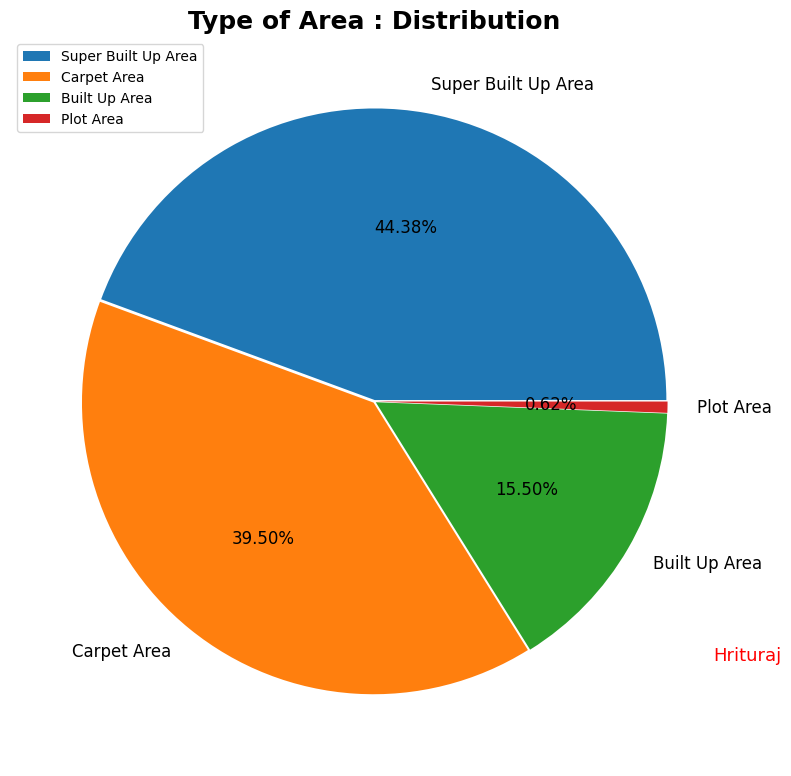

In [87]:
fig = plt.figure(figsize = (8,8))
plt.pie(mum_prop['Area_Tpye'].value_counts(),
       labels=['Super Built Up Area','Carpet Area','Built Up Area','Plot Area'],
       autopct= '%.2f%%', textprops = {'size':'large'},explode = [0.005,0.005,0.005,0.005])
plt.legend(loc= 'upper left')
plt.title("Type of Area : Distribution", fontsize = 18, fontweight = 'bold')
fig.text(0.9, 0.15, 'Hrituraj', fontsize = 13, color ='red')
pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

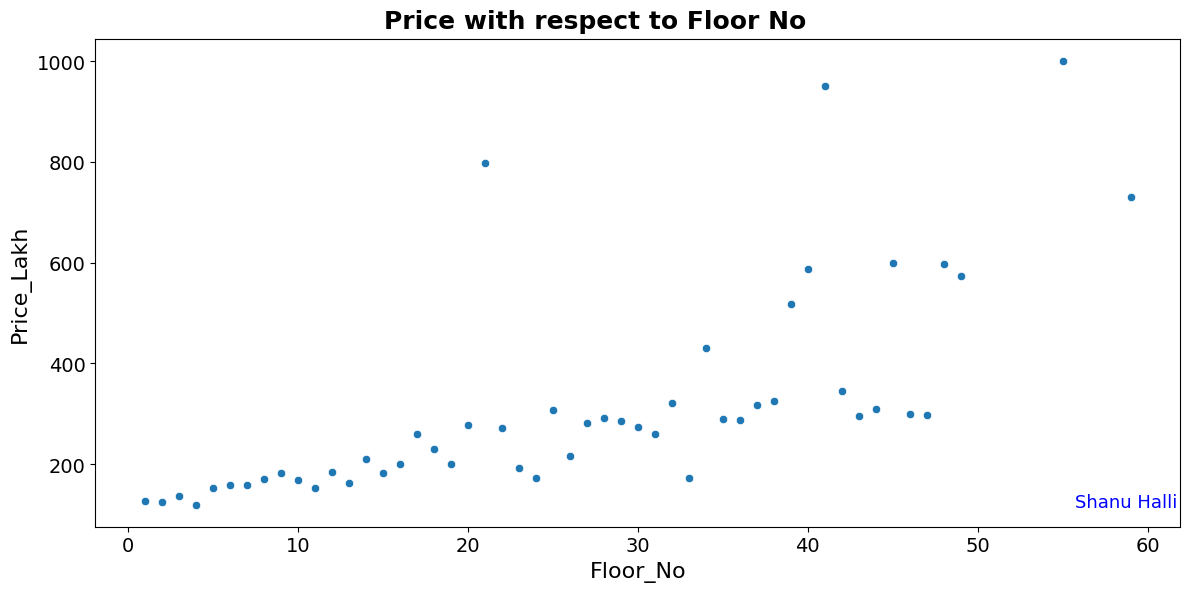

In [90]:
fig = plt.figure(figsize=(12,6))
group_full = mum_prop.groupby('Floor_No')['Price_Lakh'].mean()
group = group_full.reset_index()
group = group[group['Floor_No'] > 0]
group = group[group['Floor_No'] < 60]
x = group['Floor_No']
y = group['Price_Lakh']
fig.suptitle('Price with respect to Floor No', fontsize= 18 , fontweight='bold')
fig.text(0.9, 0.15, 'Shanu Halli', fontsize = 13, color ='blue')
sns.scatterplot(x=x, y=y)
pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

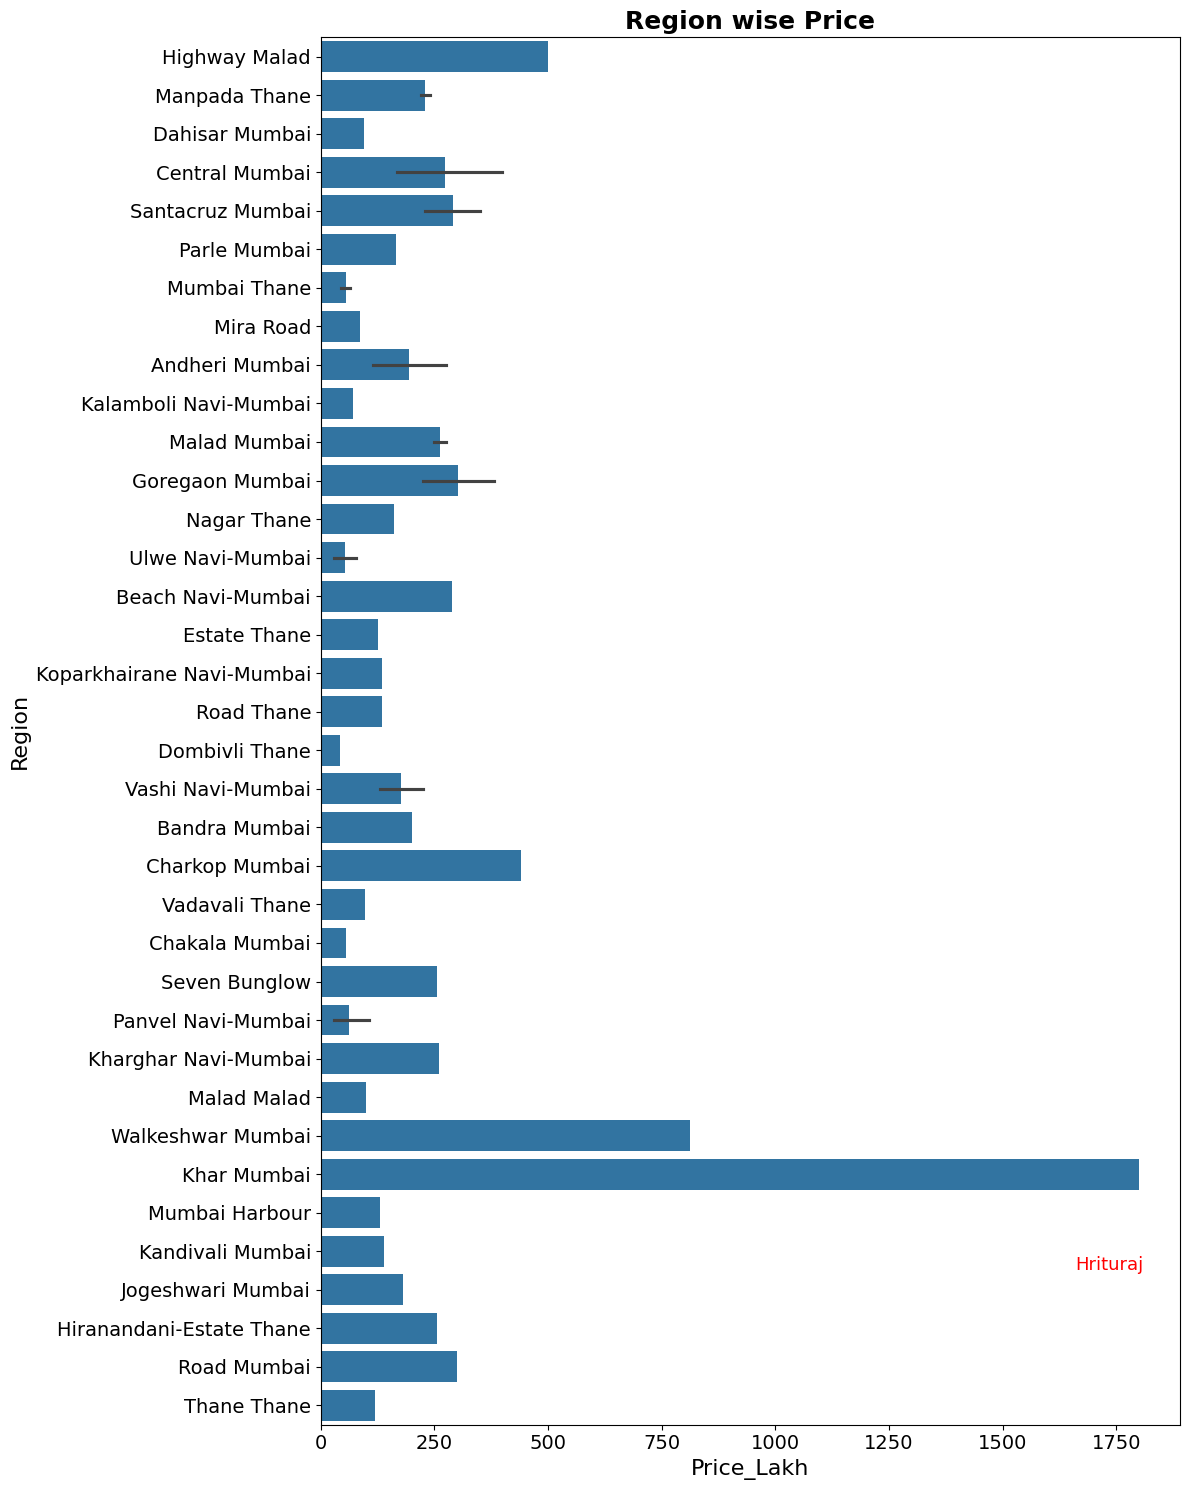

In [93]:
fig  = plt.figure(figsize=(12,15))
sns.barplot(x='Price_Lakh',y='Region',data=mum_prop.head(50))
plt.title('Region wise Price', size = 18, fontweight="bold")
fig.text(0.9, 0.15, 'Hrituraj', fontsize = 13, color ='red')
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()